In [1]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tskit as tsk
from bgspy.recmap import RecMap
from bgspy.utils import load_seqlens, load_pickle

In [109]:
plt.show()
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

# Validation and Cleanup of the Hinch et al. Recombination Map

The source of the hg36 recombination map is [here](https://www.well.ox.ac.uk/~anjali/AAmap/). See the `Snakefile` for the processing of this. This is just to ensure the processing/liftover/scaling etc is correct. We need to remove some outliers.

In [3]:
hg38sl = load_seqlens('../data/annotation/hg38_seqlens.tsv')
chroms = list(hg38sl.keys())

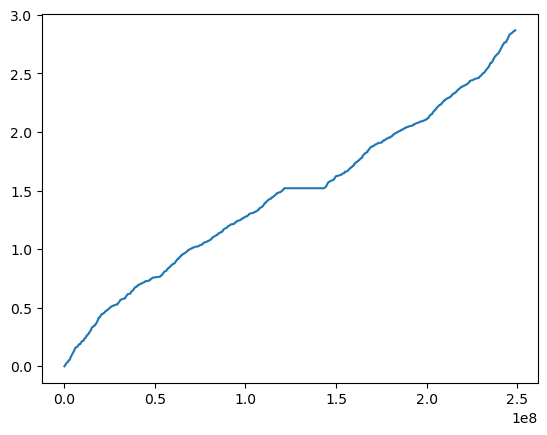

In [4]:
# first we load the HapMap lifted over to hg38
hm = RecMap('../data/annotation/hapmap_genetic_map.txt', 
            seqlens=hg38sl)

hmcr = hm.cum_rates['chr1']
plt.plot(hmcr.end, hmcr.rate)

In [16]:
# let's load decode sex-averaged too
dm = RecMap('../data/annotation/decode_sex_averaged.txt', 
            seqlens=hg38sl)

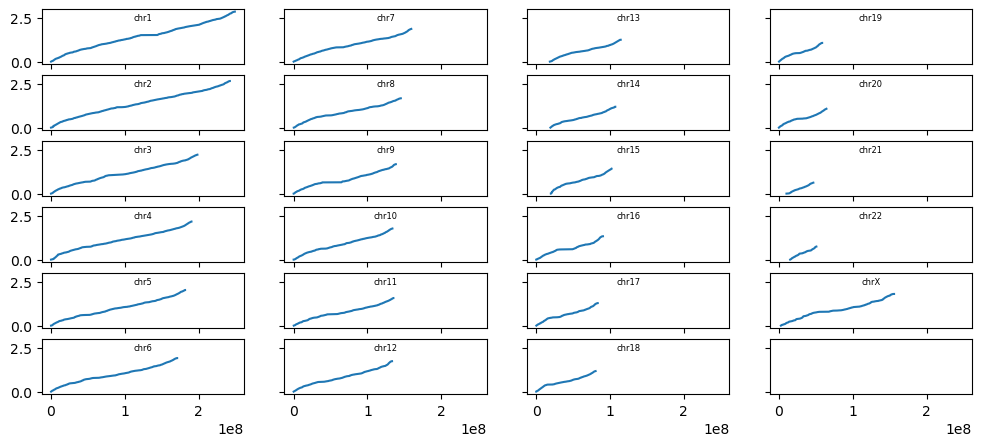

In [5]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

## Original hg36 African-American Admixture Map

This has been coverted to HapMap from my `tools/liftover_recmap.py`.

In [6]:
hg36sl = load_seqlens('../data/annotation/hg18_seqlens.tsv')
chroms = list(hg36sl.keys())

In [7]:
rm_36 = RecMap('../data/annotation/aamap_hg36.tsv',
               seqlens=hg36sl)

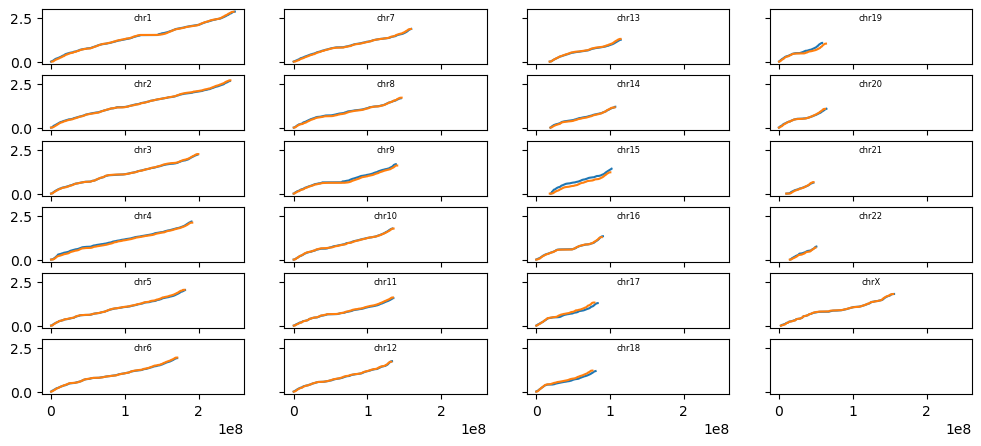

In [8]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    rm_36cr = rm_36.cum_rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate)    
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

## Validation of my liftover from hg36 to hg38

In [9]:
hg38sl = load_seqlens('../data/annotation/hg38_seqlens.tsv')
chroms = list(hg38sl.keys())

In [10]:
rm_38 = RecMap('../data/annotation/aamap_hg38.tsv',
               seqlens=hg38sl)

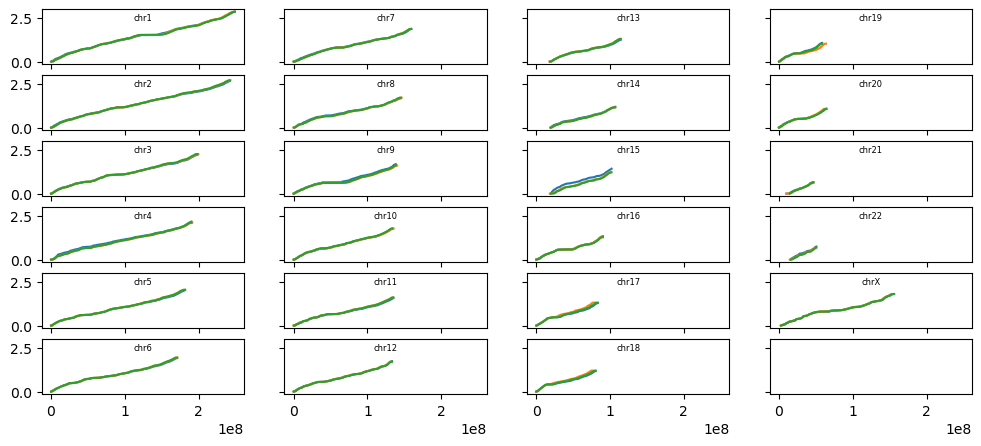

In [11]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    rm_36cr = rm_36.cum_rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate)    

    rm_38cr = rm_38.cum_rates[chrom]
    fax.plot(rm_38cr.end, rm_38cr.rate)
    
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

The original hapmap (blue) seems to have lots of recombination at the start of chr15 compared to the AA maps.

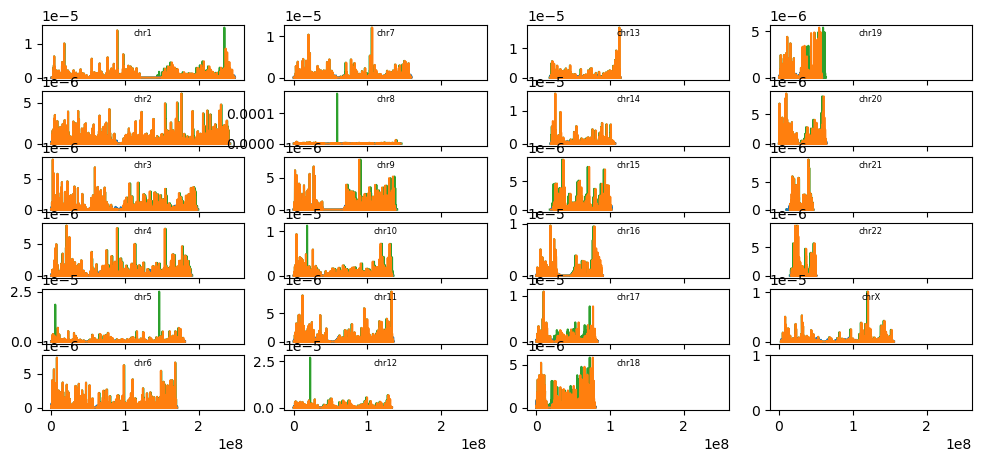

In [12]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=False)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    
    hmr = hm.rates[chrom]
    fax.plot(hmr.end, hmr.rate, zorder=2)
    
    rm_38cr = rm_38.rates[chrom]
    fax.plot(rm_38cr.end, rm_38cr.rate)
    
    rm_36cr = rm_36.rates[chrom]
    fax.plot(rm_36cr.end, rm_36cr.rate, zorder=-1)

    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

In [ ]:
THRESH = 0.001
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(8, 4), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    dc = d.loc[d['chrom'] == chrom]
    dc = dc[dc['rate'] < THRESH]
    fax = ax[col, row]
    fax.plot(0.5*(dc['start']+dc['end']), dc['rate'], label='raw Hinch et al. hg36')
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

In [ ]:
x = np.sort(d['rate'])
plt.scatter(np.arange(len(x)), x, s=0.1, c='k')
plt.loglog()
plt.axhline(THRESH, c='r')

In [ ]:
x = np.sort(d['rate'])
plt.scatter(np.arange(len(x)), x, s=0.1, c='k')
plt.loglog()
plt.xlim(1e5, 5e6)
plt.ylim(1e-8, 0)
plt.axhline(THRESH, c='r')

In [ ]:
nchroms = list(range(1, 23))

def read(c):
    return pd.read_table(f"../data/annotation/maps_b37/maps_chr.{c}",
                         skiprows=1, sep=' ', 
                         names=('pos', 'rate'))

# hg36 hinch (no liftover)
raw_lo37 = {f"chr{c}": read(c) for c in nchroms}

NameError: name 'd' is not defined

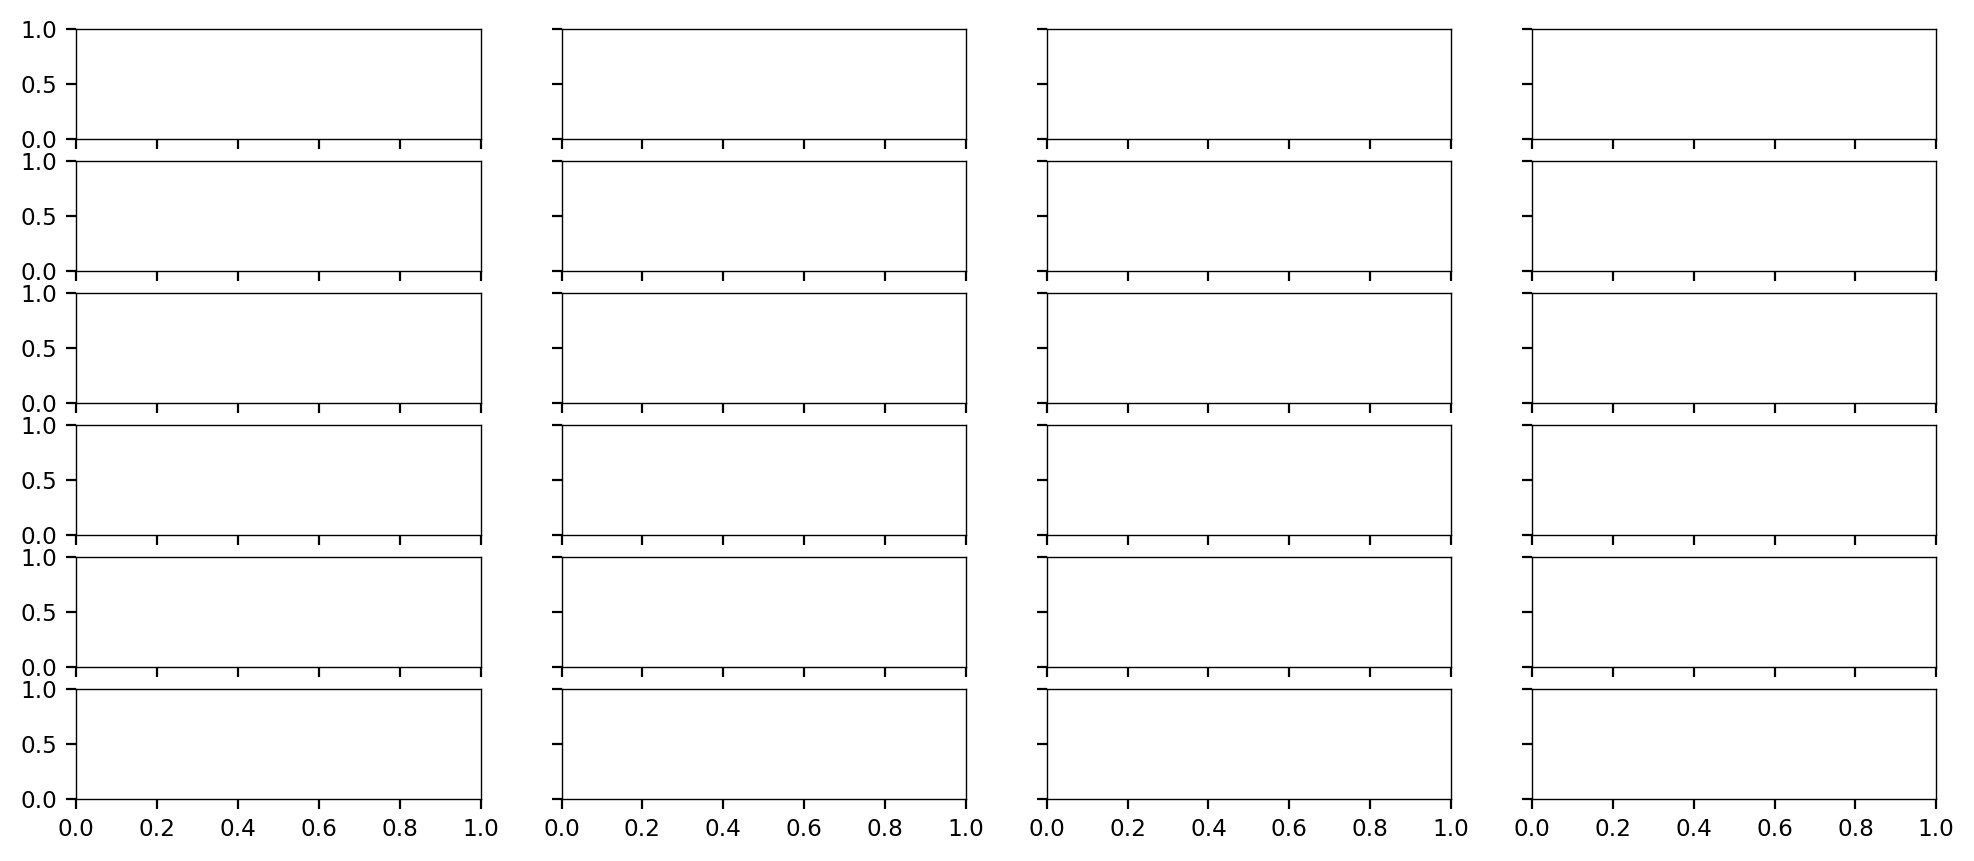

In [190]:
THRESH = 0.002
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=True)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    dc = d.loc[d['chrom'] == chrom]
    dc = dc.sort_values(['start', 'end'])
    fax = ax[col, row]    
    fax.plot(dc['end'], 1/100 * np.cumsum(dc['rate'] * (dc['end']-dc['start'])), label='liftover Hinch hg38')
    
    hmcr = hm.cum_rates[chrom]
    fax.plot(hmcr.end, hmcr.rate)
    
    # if chrom in raw_lo37:
    #     dh = raw_lo37[chrom]
    #     x, y = dh['pos'], dh['rate']
    #     fax.plot(x, y)
    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

Note the outliers — these are all in the original map, but I remove them in the `liftover_recmap.py` tool, since that
filters out markers with rates $r < 100 \sigma$

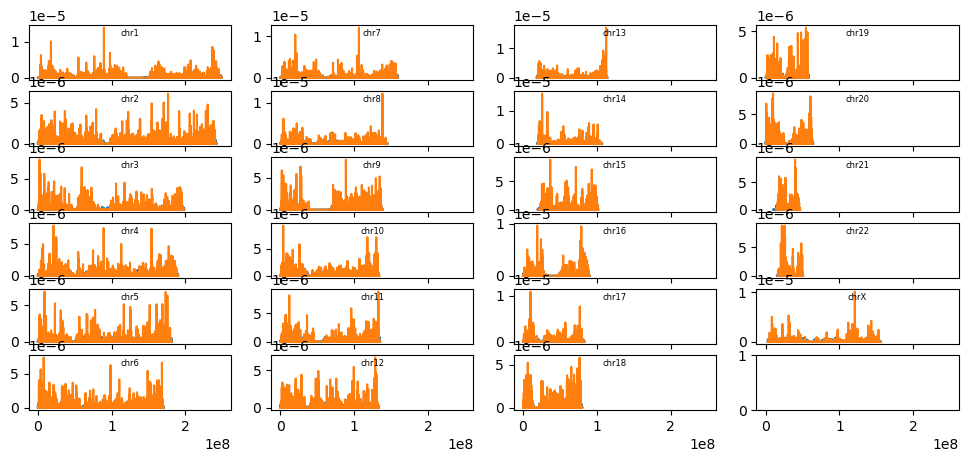

In [14]:
nc, nr = 4, 6

fig, ax = plt.subplots(ncols=nc, nrows=nr, figsize=(12, 5), sharex=True, sharey=False)
entries = list(itertools.product(list(range(nc)), list(range(nr))))
for i, chrom in enumerate(chroms):
    row, col = entries[i]
    fax = ax[col, row]    
    
    hmr = hm.rates[chrom]
    fax.plot(hmr.end, hmr.rate)
    
    rm_38r = rm_38.rates[chrom]
    fax.plot(rm_38r.end, rm_38r.rate)

    fax.text(0.5, 0.8, chrom, fontsize=6, 
             horizontalalignment='center',
             transform=fax.transAxes)

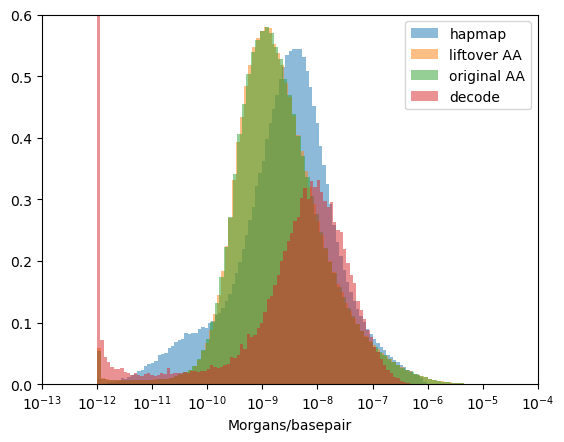

In [90]:
def all_rates(rm):
    return np.array(list(itertools.chain(*[r[1] for r in rm.rates.values()])))

fig, ax = plt.subplots()
ax.hist(np.log10(1e-12+all_rates(hm)), 100, density=True, alpha=0.5, label="hapmap")
ax.hist(np.log10(1e-12+all_rates(rm_38)), 100, density=True, alpha=0.5, label="liftover AA")
ax.hist(np.log10(1e-12+all_rates(rm_36)), 100, density=True, alpha=0.5, label="original AA")
ax.hist(np.log10(1e-12+all_rates(dm)), 100, density=True, alpha=0.5, label="decode")
ax.set_xlim(-13, -4)
ax.set_ylim(0, 0.6)
xticks = ax.get_xticks()
ax.set_xticks(xticks, [f"$10^{{{int(x)}}}$" for x in xticks])
ax.set_xlabel("Morgans/basepair")
ax.legend()

Note the mode to the left is just from the log offset (now set out of frame). Interestingly, the AA map has a slightly lower average rate.

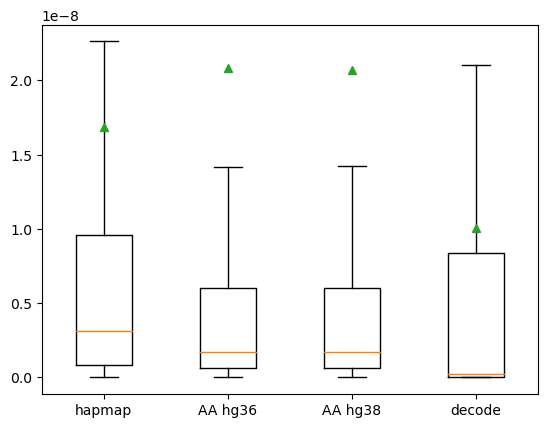

In [34]:
_ =plt.boxplot([all_rates(hm), all_rates(rm_36), all_rates(rm_38), all_rates(dm)], 
               labels=['hapmap', 'AA hg36', 'AA hg38', 'decode'],
               showfliers=False, showmeans=True)

In [36]:
a = load_pickle('../data/bmaps/bgspy/bmap_hg38_6x7grid_10000step_10000N_phastcons_not_genes_cds_full.pkl')

In [50]:
b = load_pickle('../data/bmaps/bgspy/old_hapmap_bmaps/bmap_hg38_6x7grid_10000step_10000N_phastcons_not_genes_cds_genes_full.pkl')

In [72]:
a.BpScores.w, a.BpScores.t

(array([1.00000000e-11, 6.30957344e-11, 3.98107171e-10, 2.51188643e-09,
        1.58489319e-08, 1.00000000e-07]),
 array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]))

In [78]:
b.BpScores.w, b.BpScores.t

(array([1.00000000e-11, 6.30957344e-11, 3.98107171e-10, 2.51188643e-09,
        1.58489319e-08, 1.00000000e-07]),
 array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]))

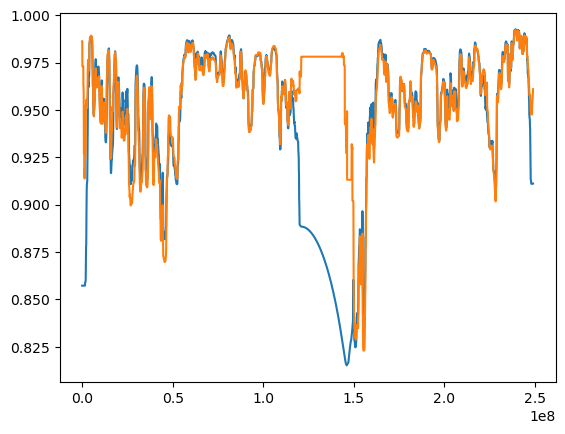

In [95]:
chrom = 'chr1'
feature = 'cds'
w, t = a.BpScores.w, a.BpScores.t
x, y = a.BpScores[chrom, w[4], t[5]]
fi = a.features.index(feature)
plt.plot(x, y[:, fi])
w, t = b.BpScores.w, b.BpScores.t
x, y = b.BpScores[chrom, w[4], t[5]]
fi = b.features.index(feature)
plt.plot(x, y[:, fi])


In [157]:
m100k = load_pickle('../fits/hg38__phastcons_not_genes_cds_genes_full__aamap/fit_100000/mle.pkl')

In [158]:
m100k

{'mb': SimplexModel (interpolated w): 6 x 7 x 4
   w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
   t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
 
 Simplex model ML estimates: (whole genome)
 negative log-likelihood: 317279838868.80884
 number of successful starts: 2000 (100.0% total)
 π0 = 0.00161609
 μ = 2.076e-09 
 Ne = 194,583 (implied from π0 and μ)
 R² = 40.531% (in-sample)
 W = 
           cds    gene    other    phastcons
 ------  -----  ------  -------  -----------
 1e-07       0   0            0            0
 1e-06       0   0            0            0
 1e-05       0   0            0            0
 0.0001      0   0.013        0            0
 0.001       1   0.396        0            1
 0.01        0   0.004        0            0
 0.1         0   0.587        1            0,
 'mbp': SimplexModel (interpolated w): 6 x 7 x 4
   w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)

In [145]:
m = load_pickle('../fits/hg38__phastcons_not_genes_cds_genes_full__aamap/fit_1000000/mle.pkl')

In [146]:
m

/home/vsb/miniconda3/envs/bprime/lib/python3.10/site-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)


{'mb': SimplexModel (interpolated w): 6 x 7 x 4
   w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
   t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
 
 Simplex model ML estimates: (whole genome)
 negative log-likelihood: 315914326176.3706
 number of successful starts: 2000 (100.0% total)
 π0 = 0.00157859
 μ = 2.116e-09 
 Ne = 186,471 (implied from π0 and μ)
 R² = 55.4025% (in-sample)
 W = 
           cds    gene    other    phastcons
 ------  -----  ------  -------  -----------
 1e-07       0   0            0            0
 1e-06       0   0            0            0
 1e-05       0   0            0            0
 0.0001      0   0            0            0
 0.001       0   0.339        0            1
 0.01        1   0.163        0            0
 0.1         0   0.498        1            0,
 'mbp': SimplexModel (interpolated w): 6 x 7 x 4
   w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)

(<Figure size 1600x800 with 6 Axes>,
 array([<AxesSubplot: ylabel='cds'>, <AxesSubplot: ylabel='gene'>,
        <AxesSubplot: ylabel='other'>, <AxesSubplot: ylabel='phastcons'>,
        <AxesSubplot: ylabel='$\\pi_0$ ($\\times^{-3}$)'>,
        <AxesSubplot: ylabel='$\\mu$ ($\\times^{-8}$)'>], dtype=object))

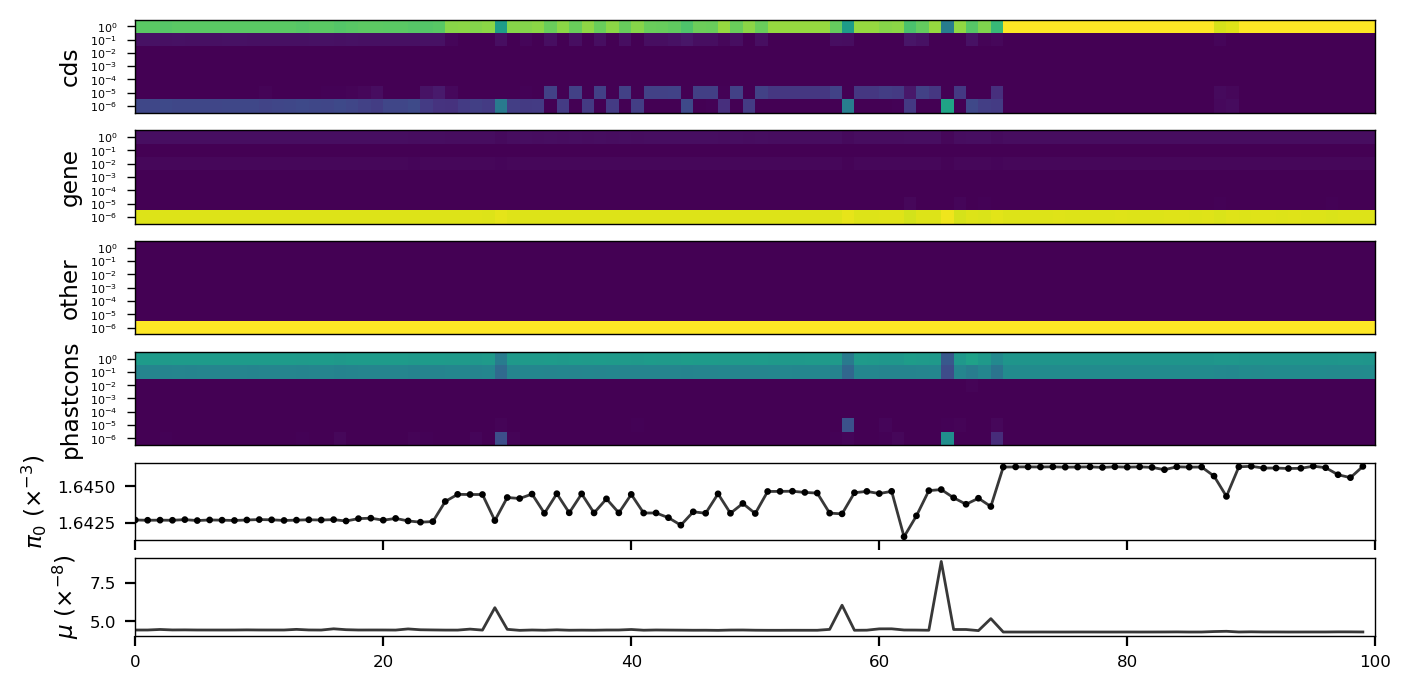

In [147]:
from bgspy.optim import optim_diagnotics_plot

optim_diagnotics_plot(m['mbp'])

(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot: xlabel='position', ylabel='$\\pi/\\bar{\\pi}$'>)

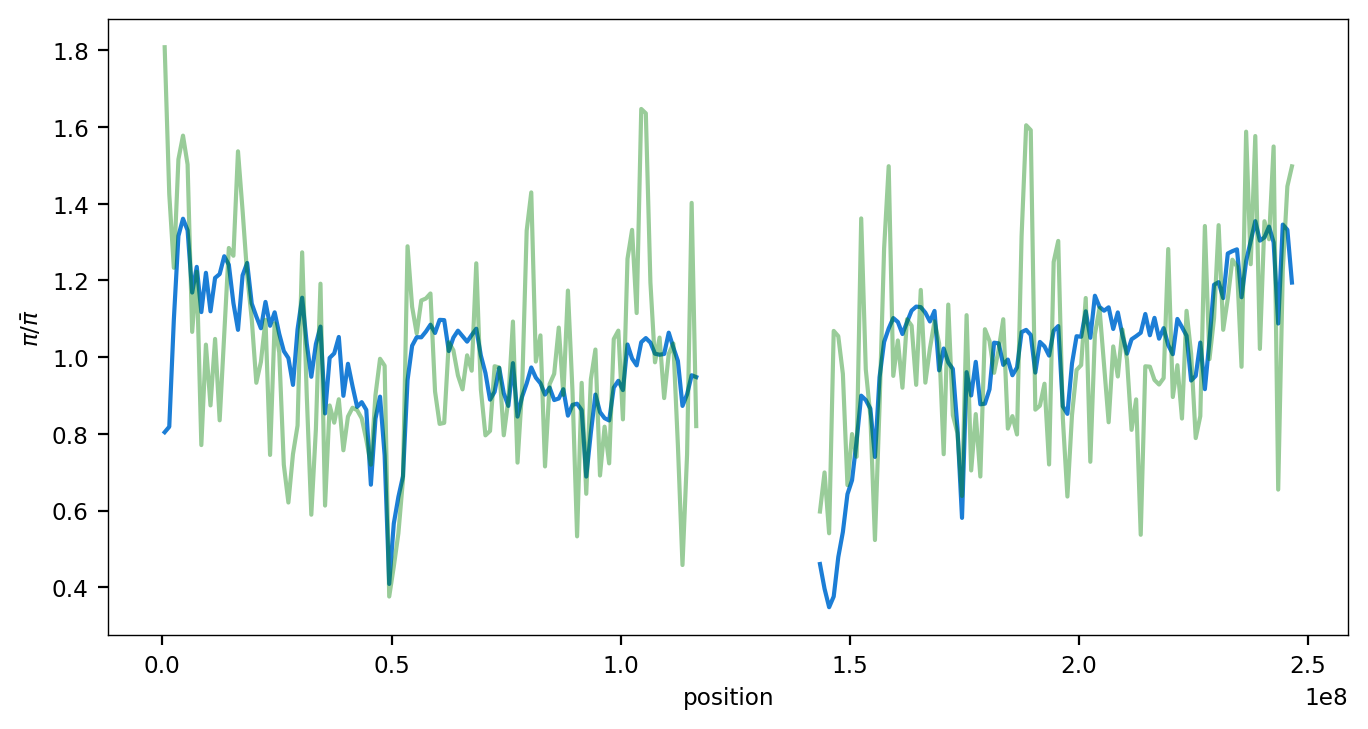

In [148]:
m['mbp'].predict_plot('chr1')

(<Figure size 1600x800 with 1 Axes>, <AxesSubplot: >)

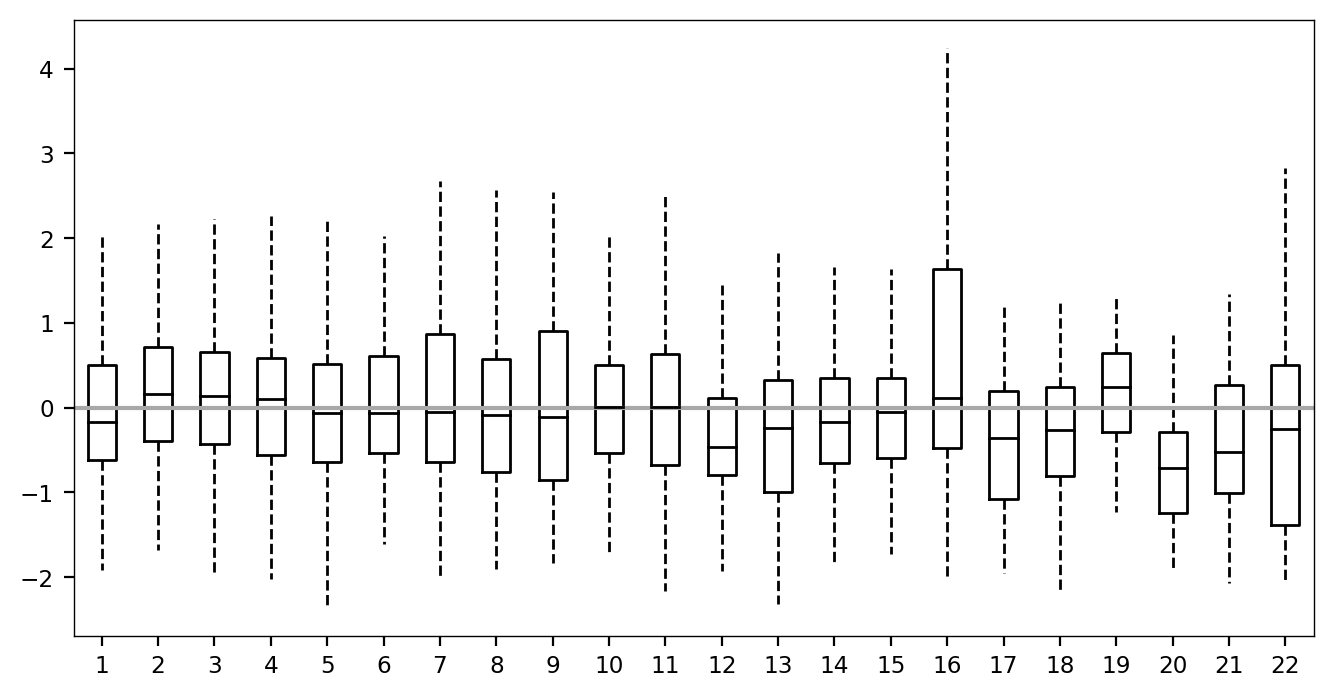

In [149]:
m['mbp'].chrom_resid_plot()

(<Figure size 1600x800 with 1 Axes>,
 <AxesSubplot: xlabel='predicted $\\hat{\\pi}$', ylabel='residuals'>)

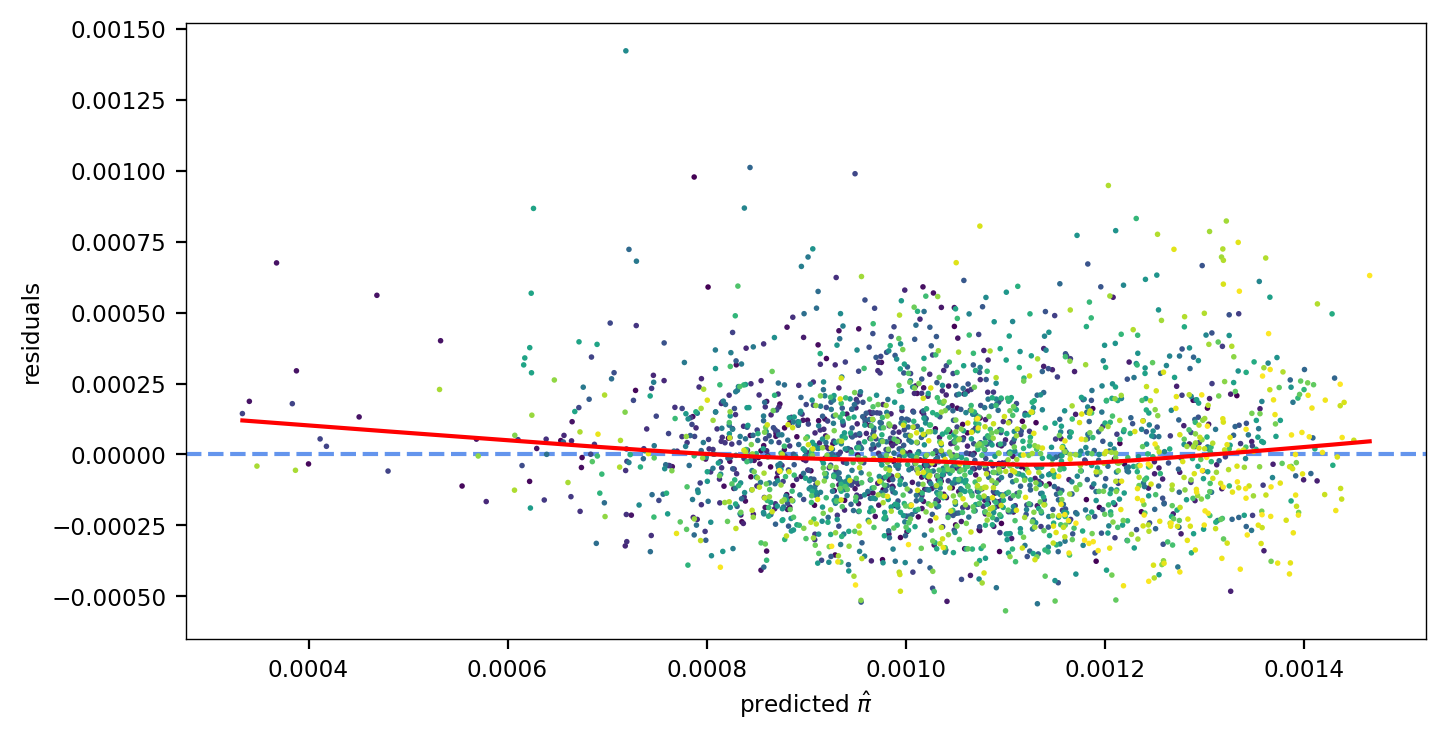

In [150]:
m['mbp'].resid_fitted_plot()

In [151]:
m['mbp'].predict() < 0.0006

array([False, False, False, ..., False, False, False])

In [152]:
import os
loo_dir = '../fits/hg38__phastcons_not_genes_cds_genes_full__aamap/fit_1000000/loo/'
loos = os.listdir(loo_dir)

ms = [load_pickle(os.path.join(loo_dir, f)) for f in loos]

In [170]:
m['mbp'].Y.shape

(2463, 2)

In [172]:
ms[0]['mbp']._indices_fit.shape

(2344,)

In [155]:
m['mbp'].load_jackknives('../fits/hg38__phastcons_not_genes_cds_genes_full__aamap/fit_1000000/loo/')

(array([1., 3., 3., 1., 2., 3., 1., 0., 4., 1.]),
 array([0.46443818, 0.50243425, 0.54043032, 0.57842638, 0.61642245,
        0.65441852, 0.69241459, 0.73041066, 0.76840672, 0.80640279,
        0.84439886]),
 <BarContainer object of 10 artists>)

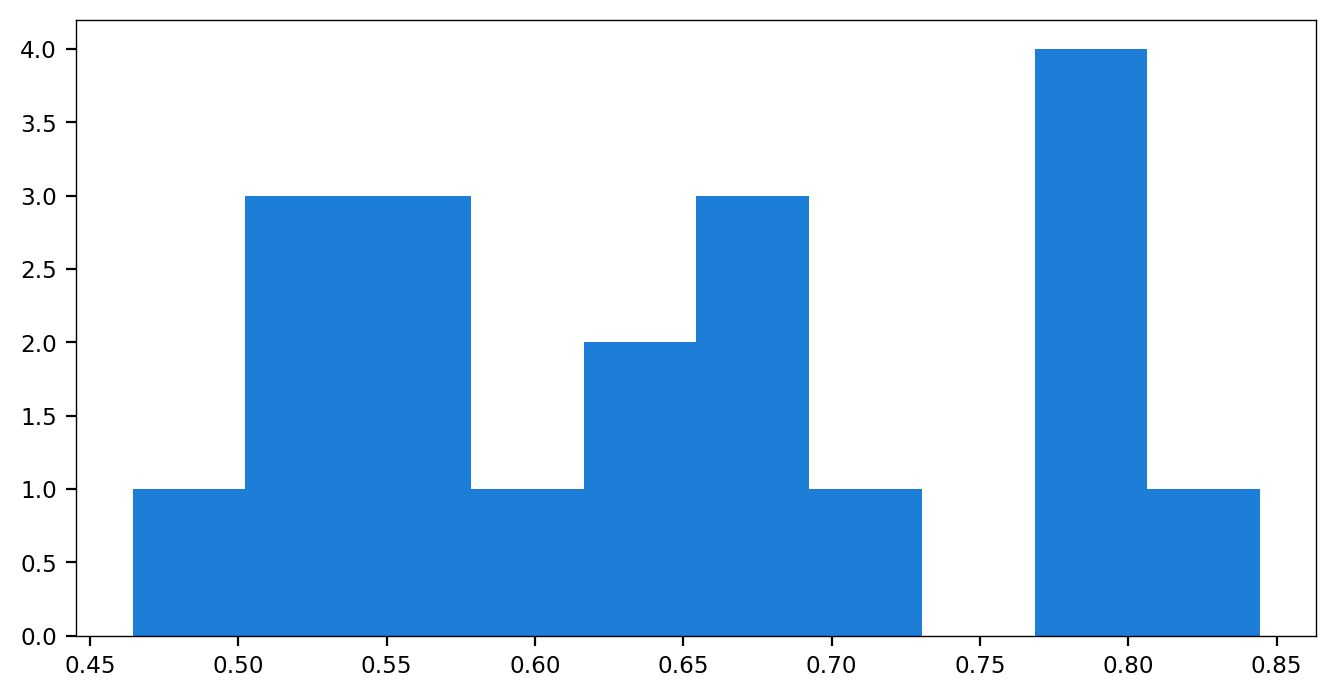

In [174]:
plt.hist(m['mbp'].loo_R2().values())

In [178]:
r2, weights = m['mbp'].loo_R2()

np.average(list(r2.values()), weights=list(weights.values()))

0.6128289077163799

In [162]:
m['mbp'].loo_stderr()

array([6.91783190e-05, 1.12138458e-08, 3.12455136e-01, 2.72549696e-02,
       1.78633659e-06, 3.35694556e-03, 1.53415034e-03, 1.36493297e-04,
       1.72876708e-06, 9.41676772e-04, 2.45486704e-05, 3.77236368e-06,
       1.61938999e-07, 1.58332399e-05, 1.80163569e-06, 4.67540595e-08,
       2.66552612e-09, 2.38844067e-06, 1.50524826e-05, 3.88644798e-03,
       3.55222736e-08, 1.87685073e-05, 1.54383885e-01, 1.90919691e-03,
       3.69411561e-08, 2.51696947e-01, 3.85047859e-01, 2.48960823e-02,
       4.83373554e-07, 2.51754723e-01])

In [189]:
m['mbp'].bins.chrom_indices()

[autoreload of bgspy.bootstrap failed: Traceback (most recent call last):
  File "/home/vsb/miniconda3/envs/bprime/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/vsb/miniconda3/envs/bprime/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/vsb/miniconda3/envs/bprime/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/vsb/projects/bprime/bgspy/bootstrap.py", line 16
    def resample_blocks(bins, blocksize,

TypeError: GenomicBinnedData.chrom_indices() missing 1 required positional argument: 'chrom'

In [163]:
m['mbp']

SimplexModel (interpolated w): 6 x 7 x 4
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates: (whole genome)
negative log-likelihood: 315829317008.7686
number of successful starts: 2000 (100.0% total)
π0 = 0.00164267 (0.00150, 0.00178)
μ = 4.445e-08  (2.2e-08, 6.69e-08)
Ne = 9,238 (implied from π0 and μ)
R² = 60.7773% (in-sample)  64.557% (out-sample)
W = 
        cds                    gene                   other                  phastcons
------  ---------------------  ---------------------  ---------------------  ---------------------
1e-07   0.213 (-0.412, 0.838)  0.948 (0.893, 1.002)   1.000 (1.000, 1.000)   0.000 (-0.007, 0.007)
1e-06   0.001 (-0.002, 0.004)  0.000 (0.000, 0.001)   0.000 (-0.000, 0.000)  0.000 (-0.002, 0.002)
1e-05   0.000 (-0.000, 0.000)  0.000 (-0.000, 0.000)  0.000 (-0.000, 0.000)  0.000 (-0.000, 0.000)
0.0001  0.000 (-0.000, 0.0

[]

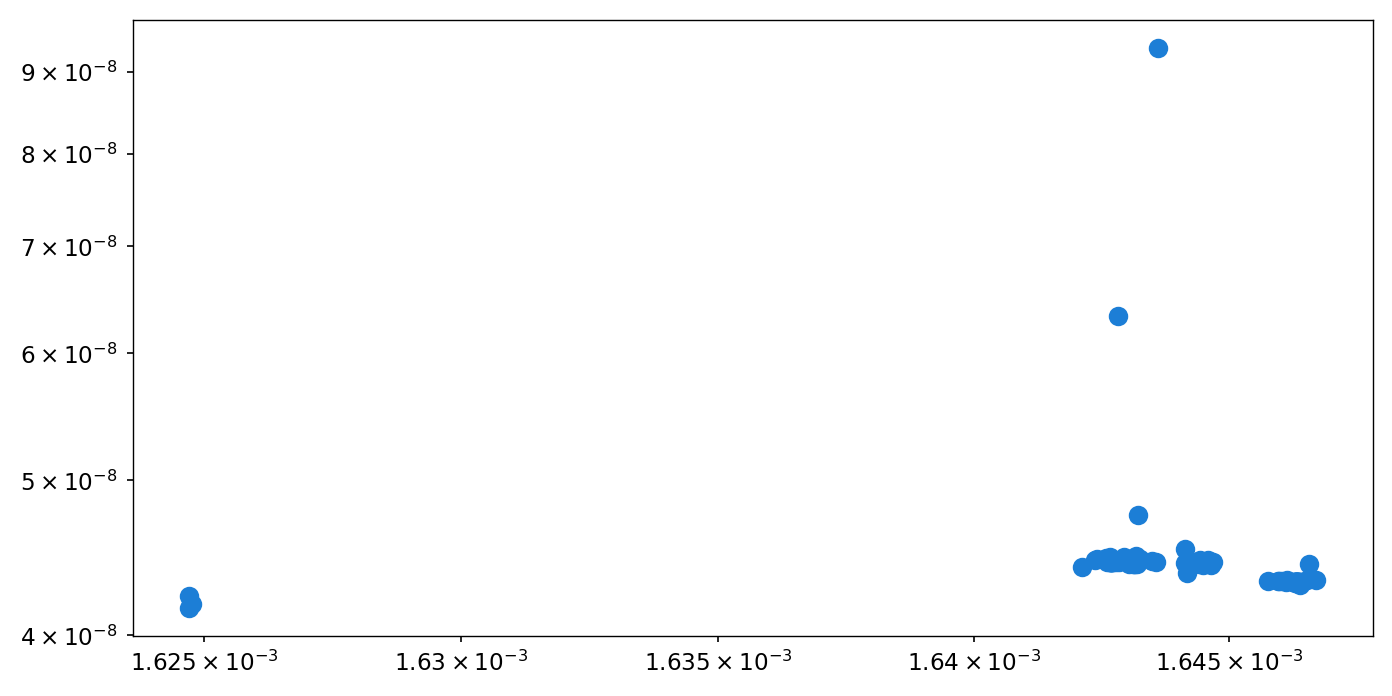

In [143]:
plt.scatter(*m['mbp'].optim.thetas[:100, :2].T)
plt.loglog()